In [1]:
from openbb_terminal.sdk import openbb
from datetime import datetime
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

Forecasting Toolkit is disabled. To use the Forecasting features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

Portfolio Optimization Toolkit is disabled. To use the Optimization features please install the toolkit following the instructions here: https://my.openbb.co/app/sdk/installation

In [6]:
obv = openbb.ta.obv(data = openbb.stocks.load('QQQ'))
obv.head()

Loading Daily data for QQQ with starting period 2020-09-08.

,OBV
date,
2020-09-08,99568600.0
2020-09-09,164406500.0
2020-09-10,94739000.0
2020-09-11,22930000.0
2020-09-14,61455200.0


In [8]:
help(openbb.stocks)

Help on StocksController in module openbb_terminal.core.sdk.controllers.stocks_sdk_controller object:

class StocksController(openbb_terminal.core.sdk.models.stocks_sdk_model.StocksRoot)
 |  Stocks Module.
 |  
 |  Submodules:
 |      `ba`: Behavioral Analysis Module
 |      `ca`: Comparison Analysis Module
 |      `disc`: Discovery Module
 |      `dps`: Darkpool Shorts Module
 |      `fa`: Fundamental Analysis Module
 |      `gov`: Government Module
 |      `ins`: Insiders Module
 |      `options`: Options Module
 |      `qa`: Quantitative Analysis Module
 |      `screener`: Screener Module
 |      `ta`: Technical Analysis Module
 |      `th`: Trading Hours Module
 |  
 |  Attributes:
 |      `candle`: Show candle plot of loaded ticker.
 |  
 |      `load`: Load a symbol to perform analysis using the string above as a template.
 |  
 |      `news`: Get news for a given term and source. [Source: Ultima Insights News Monitor]
 |  
 |      `process_candle`: Process DataFrame into candle 

In [11]:
openbb.ta.obv(data = openbb.stocks.load('QQQ'))

Loading Daily data for QQQ with starting period 2020-09-08.

,OBV
date,
2020-09-08,99568600.0
2020-09-09,164406500.0
2020-09-10,94739000.0
2020-09-11,22930000.0
2020-09-14,61455200.0
...,...
2023-09-05,-883816600.0
2023-09-06,-926815300.0
2023-09-07,-978876000.0


In [12]:
openbb.ta.obv_chart(data= openbb.stocks.load('QQQ', start_date = '2022-11-18', interval = 5, prepost = True))

yfinance: download(show_errors=False) argument is deprecated and will be removed in future version. Do this instead to suppress error messages: logging.getLogger('yfinance').setLevel(logging.CRITICAL)


Loading Intraday 5min data for QQQ with starting period 2023-07-17.

In [13]:
es = openbb.stocks.load("ES=F")

openbb.ta.ma_chart(
    data = es['Adj Close'],
    symbol = 'E-Mini S&P Futures',
    ma_type = 'SMA',
    window = [21, 150])

Loading Daily data for ES=F with starting period 2020-09-08.

In [22]:
gf = openbb.stocks.load("GC=F")

openbb.ta.ma_chart(
    data = gf['Adj Close'],
    symbol= 'Gold Futures CME',
    ma_type= 'ZLMA',
    window= [21,150]

)

Loading Daily data for GC=F with starting period 2020-09-08.

In [17]:
ticker = 'GC=F'
start = '2000-01-01'

df_atr = openbb.ta.atr(data = openbb.stocks.load(f"{ticker}", start_date = f"{start}", monthly = True), window = 6)

df_atr.tail(5)

Loading Monthly data for GC=F with starting period 2000-09-01.

,ATRe_6
date,
2023-05-01,133.678003
2023-06-01,121.341431
2023-07-01,108.158186
2023-08-01,101.970133
2023-09-01,82.464367


In [24]:
ticker = 'GC=F'
start = '2000-01-01'
data_df: pd.DataFrame = openbb.stocks.load(f"{ticker}", start_date = f"{start}", monthly = True)

openbb.ta.donchian_chart(data_df)

Loading Monthly data for GC=F with starting period 2000-09-01.

In [19]:
ticker = 'GC=F'
start = '2000-01-01'
data_df: pd.DataFrame = openbb.stocks.load(f"{ticker}", start_date = f"{start}", monthly = True)

donchian = openbb.ta.donchian(data_df)

data_df = data_df.join(donchian)

data_df.tail(5)

Loading Monthly data for GC=F with starting period 2000-09-01.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,DCL_20_20,DCM_20_20,DCU_20_20
date,,,,,,,,,,,
2023-05-01,1980.099976,2072.000000,1931.000000,1963.900024,1963.900024,215367,0.0,0.0,1615.099976,1843.549988,2072.0
2023-06-01,1963.199951,1983.000000,1892.500000,1921.099976,1921.099976,6383,0.0,0.0,1615.099976,1843.549988,2072.0
2023-07-01,1917.900024,1978.400024,1903.199951,1970.500000,1970.500000,220474,0.0,0.0,1615.099976,1843.549988,2072.0
2023-08-01,1964.900024,1965.400024,1884.000000,1938.199951,1938.199951,9086,0.0,0.0,1615.099976,1843.549988,2072.0
2023-09-01,1950.000000,1950.000000,1916.300049,1947.000000,1947.000000,13815,0.0,0.0,1615.099976,1843.549988,2072.0


In [26]:
adx = openbb.ta.adx(data=data_df)
adx

,ADX_14,DMP_14,DMN_14
date,,,
2003-05-01,57.067343,41.970179,11.970666
2003-07-01,56.912796,38.559383,10.997844
2003-08-01,57.114995,38.218781,9.891857
2003-09-01,57.685022,40.920507,9.340712
2003-10-01,58.322874,39.075028,8.501301
...,...,...,...
2023-05-01,31.053491,29.941117,13.163263
2023-06-01,31.086222,28.323660,14.750309
2023-07-01,31.116615,27.017592,14.070139


<Axes: xlabel='date'>

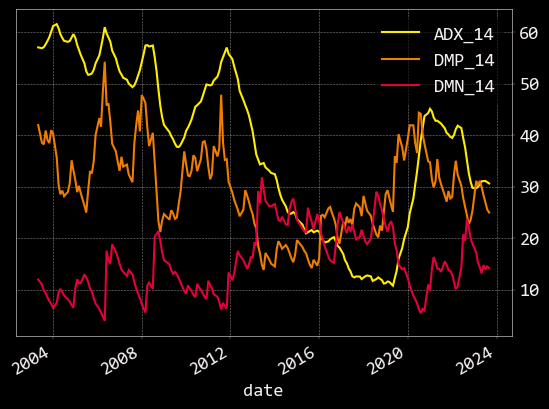

In [27]:
adx.plot()

In [29]:
accum_dist = openbb.ta.ad(data=data_df)
accum_dist

,AD
date,
2000-09-01,-9.128957e+01
2000-11-01,3.134302e+04
2000-12-01,3.134302e+04
2001-01-01,3.134311e+04
2001-02-01,3.208701e+04
...,...
2023-05-01,1.363670e+06
2023-06-01,1.361321e+06
2023-07-01,1.535472e+06


<Axes: xlabel='date'>

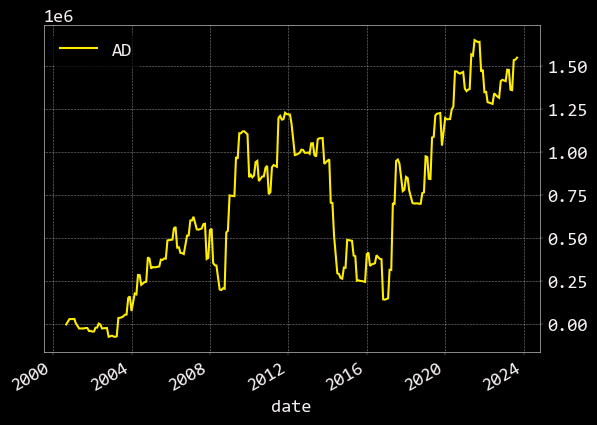

In [30]:
accum_dist.plot()